In [2]:
import os
import re
from tqdm import tqdm_notebook
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
col_frames = os.listdir('./frames')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('frames/'+i)
    col_images.append(img)

<ipython-input-4-52e5be2387e5>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


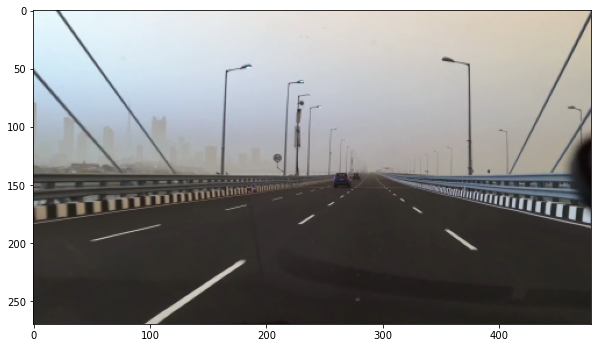

In [7]:
plt.figure(figsize = (10,10))
plt.imshow(col_images[457][;,;,0], cmap='gray')
plt.show()

In [10]:
stencil = np.zeros_like(col_images[457][:,:,0])
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

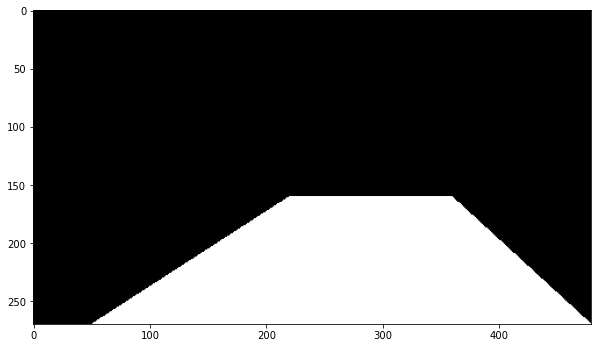

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(stencil, cmap='gray')
plt.show()

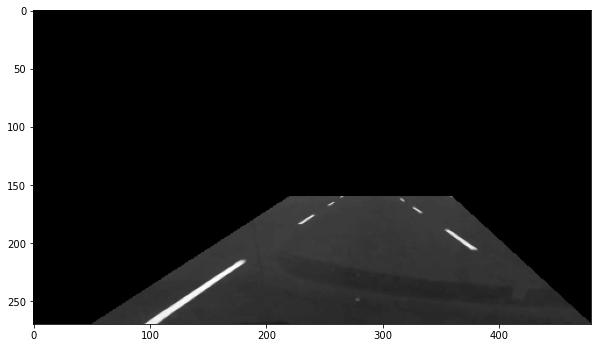

In [13]:
img = cv2.bitwise_and(col_images[457][:,:,0], col_images[457][:,:,0], mask=stencil)

plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')
plt.show()

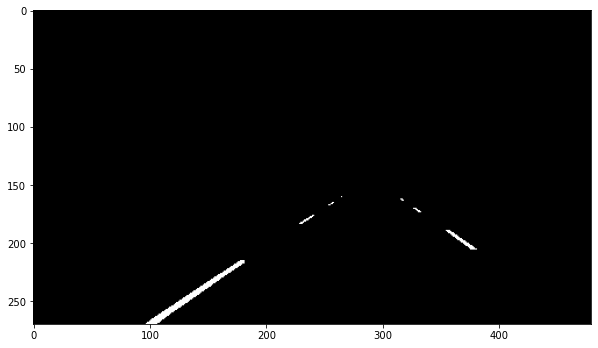

In [14]:
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.imshow(thresh, cmap = 'gray')
plt.show()

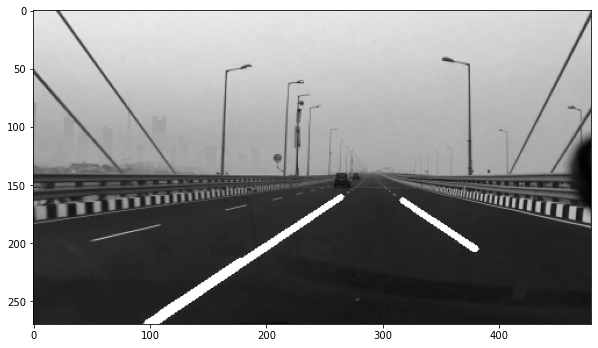

In [17]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap = 200)
copy_i = col_images[457][:,:,0].copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(copy_i, (x1, y1), (x2, y2), (255, 0 ,0), 3)
    
plt.figure(figsize = (10,10))
plt.imshow(copy_i, cmap = 'gray')
plt.show()